# Data Science for Business

## Spring 2020, module 4 @ HSE

---

## Home assignment 3


Author: **Miron Rogovets**

---

_“You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.”_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
sns.set_style('darkgrid')

In [3]:
features = pd.read_csv('data/walmart/features.csv')
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,False
1,1,2010-02-12,38.510,2.548,nan,nan,nan,nan,nan,211.242,8.106,True
2,1,2010-02-19,39.930,2.514,nan,nan,nan,nan,nan,211.289,8.106,False


In [4]:
stores = pd.read_csv('data/walmart/stores.csv')
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [5]:
train = pd.read_csv('data/walmart/train.csv')
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.500,False
1,1,1,2010-02-12,46039.490,True
2,1,1,2010-02-19,41595.550,False


In [6]:
print(f"Train: {train.shape}")
print(f"Stores: {stores.shape}")
print(f"Features: {features.shape}")

Train: (421570, 5)
Stores: (45, 3)
Features: (8190, 12)


In [7]:
df = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'])
df = pd.merge(df, stores, on=['Store'])
df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.500,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315
1,1,2,2010-02-05,50605.270,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315
2,1,3,2010-02-05,13740.120,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315


In [8]:
df.shape

(421570, 16)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df.Date.dt.week
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2010-02-05,24924.500,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.270,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.120,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.040,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.380,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315,5,2,2010


In [10]:
len(df.Date.unique())

143

In [11]:
train_weeks = df.Date.sort_values().unique()[:-39].tolist()
test_weeks = df.Date.sort_values().unique()[-39:].tolist()

In [12]:
print(len(train_weeks))
len(test_weeks)

104


39

In [13]:
train = df[df.Date.isin(train_weeks)].copy()
test = df[df.Date.isin(test_weeks)].copy()

In [14]:
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

Train: (305982, 19)
Test: (115588, 19)


In [15]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Week                     int64
Month                    int64
Year                     int64
dtype: object

In [16]:
df.sort_values(by=['Date', 'Store', 'Dept'], inplace=True)
df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2010-02-05,24924.500,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.270,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.120,False,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,A,151315,5,2,2010


### I. Exploratory Data Analysis & Feature generation (20 points)

#### 1. Analyze target variable. 
- Compare different stores by `Weekly_Sales`: 
  - What is the store (Store ID) with the biggest total sales in September 2011; smallest total sales in January 2011? 
  - Did the store with the largest sales in March change from 2010 to 2011; from 2011 to 2012?

- Compare different departments by `Weekly_Sales`:
  - How many departments have substantially larger sales during holidays (>= 200%) compared to regular weeks (averaged over all train period, over all stores)?
  - How many departments have substantially smaller sales during holidays (<=50%) compared to regular weeks (averaged over all train period, over all stores)?
  - Generate new attribute `Department_Type` (1,2,3): 1 for departments that have substantially smaller sales during holidays (<=50%) compared to regular weeks (averaged over all train period, over all stores); 3 for departments that have substantially larger sales during holidays (>= 200%) compared to regular weeks (averaged over all train period, over all stores); 2 for all other departments. How many departments of each type do you have? 
 


In [22]:
monthly = df.groupby(['Store', 'Month', 'Year'])['Weekly_Sales'].sum().reset_index()
monthly.head(3)

,Store,Month,Year,Weekly_Sales
0,1,1,2011,5480050.970
1,1,1,2012,5723690.520
2,1,2,2010,6307344.100


In [34]:
monthly.iloc[monthly[(monthly.Month == 9) & (monthly.Year == 2011)]['Weekly_Sales'].idxmax()]

Store                 4.000
Month                 9.000
Year               2011.000
Weekly_Sales   10208029.690
Name: 123, dtype: float64

In [36]:
monthly.iloc[monthly[(monthly.Month == 1) & (monthly.Year == 2011)]['Weekly_Sales'].idxmin()]

Store              33.000
Month               1.000
Year             2011.000
Weekly_Sales   979488.910
Name: 1056, dtype: float64

In [37]:
print(f"2010/3: {monthly.iloc[monthly[(monthly.Month == 3) & (monthly.Year == 2010)]['Weekly_Sales'].idxmax()].Store}")
print(f"2011/3: {monthly.iloc[monthly[(monthly.Month == 3) & (monthly.Year == 2011)]['Weekly_Sales'].idxmax()].Store}")
print(f"2012/3: {monthly.iloc[monthly[(monthly.Month == 3) & (monthly.Year == 2012)]['Weekly_Sales'].idxmax()].Store}")

2010/3: 14.0
2011/3: 4.0
2012/3: 4.0


In [54]:
len(train.Dept.unique())

81

In [48]:
depts = train.groupby(['Dept','IsHoliday'])['Weekly_Sales'].mean().reset_index()
depts.head(3)

,Dept,IsHoliday,Weekly_Sales
0,1,False,19375.794
1,1,True,19545.576
2,2,False,43534.244


In [53]:
depts['SalesHoliday'] = depts[depts.IsHoliday == True]['Weekly_Sales']
depts['SalesRegular'] = depts[depts.IsHoliday == False]['Weekly_Sales']
depts

,Dept,IsHoliday,Weekly_Sales,SalesHoliday,SalesRegular
0,1,False,19375.794,nan,19375.794
1,1,True,19545.576,19545.576,nan
2,2,False,43534.244,nan,43534.244
3,2,True,41324.319,41324.319,nan
4,3,False,11605.199,nan,11605.199
...,...,...,...,...,...
156,97,True,13525.251,13525.251,nan
157,98,False,6915.552,nan,6915.552
158,98,True,7787.945,7787.945,nan
159,99,False,611.384,nan,611.384


In [62]:
depts = depts.groupby(['Dept'])[['SalesHoliday', 'SalesRegular']].first().reset_index()
depts.head(3)

,Dept,SalesHoliday,SalesRegular
0,1,19545.576,19375.794
1,2,41324.319,43534.244
2,3,11114.154,11605.199


In [74]:
depts.loc[depts['SalesHoliday'] >= depts['SalesRegular'] * 2, 'DeptType'] = 1
depts.loc[depts['SalesHoliday'] <= depts['SalesRegular'] / 2, 'DeptType'] = 3
depts.DeptType = depts.DeptType.fillna(2)
depts

,Dept,SalesHoliday,SalesRegular,DeptType
0,1,19545.576,19375.794,2.000
1,2,41324.319,43534.244,2.000
2,3,11114.154,11605.199,2.000
3,4,26431.594,25758.321,2.000
4,5,35817.719,21790.760,2.000
...,...,...,...,...
76,95,64806.567,69402.002,2.000
77,96,17210.386,14992.930,2.000
78,97,13525.251,14206.455,2.000
79,98,7787.945,6915.552,2.000


In [78]:
depts.DeptType.value_counts()

2.000    74
1.000     4
3.000     3
Name: DeptType, dtype: int64

#### 2. Analyze `Size` and `Type`.

- Compute correlation between total `Weekly_Sales` (in millions) over all training set and `Size`.
- Plot a scatter plot total (over all training set) `Weekly_Sales` (in millions) in a store vs  `Size` of the store.
- Plot a boxplot of `Weekly_Sales` for different store types (3 boxes, one for every Type). For this plot filter out all `Weekly_Sales` bigger than 70000.
- Find Stores with Type == `B` which have total `Weekly_Sales`, (in millions) over all training set, more than 80% percentile of total `Weekly_Sales` of stores with Type == `A`.
- Generate new attribute `Total_Sales_Store_Type`. 5 (from 1 to 5) groups generated using percentiles (0<=p<20, 20<=p<40, 40<=p<60, 60<=p<80, 80<=p<=100) of total `Weekly_Sales` (in millions) over all training set. How many stores of each type do you have?

In [84]:
size_sales = df.groupby(['Store', 'Size']).sum().reset_index()[['Size', 'Weekly_Sales']]
size_sales.corr()

,Size,Weekly_Sales
Size,1.000,0.846
Weekly_Sales,0.846,1.000


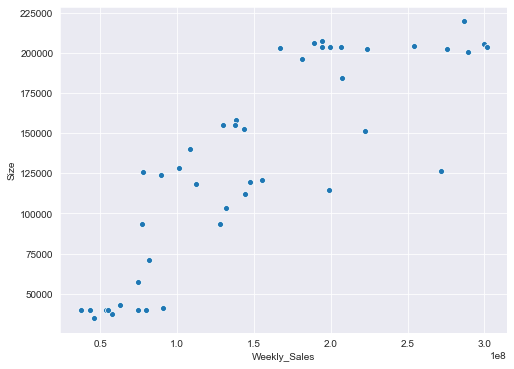

In [87]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Weekly_Sales', y='Size', data=size_sales)
plt.show()

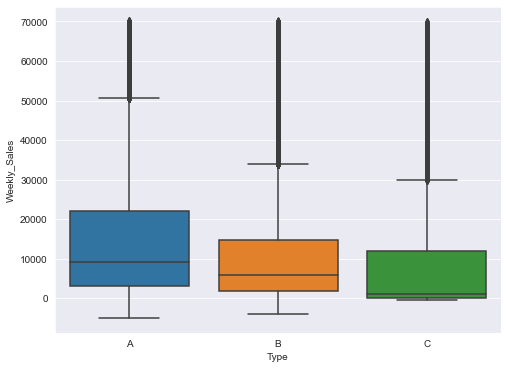

In [89]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Type', y='Weekly_Sales', data=train[train.Weekly_Sales <= 70000])
plt.show()

In [91]:
types = df.groupby(['Store', 'Type'])['Weekly_Sales'].sum().reset_index()
types.head(3)

,Store,Type,Weekly_Sales
0,1,A,222402808.850
1,2,A,275382440.980
2,3,B,57586735.070


In [96]:
types[(types.Type == 'B') & (
    types[types.Type == 'B'].Weekly_Sales > types[types.Type == 'A'].Weekly_Sales.quantile(0.8))]

,Store,Type,Weekly_Sales
9,10,B,271617713.890


In [97]:
p20 = types.Weekly_Sales.quantile(.2)
p40 = types.Weekly_Sales.quantile(.4)
p60 = types.Weekly_Sales.quantile(.6)
p80 = types.Weekly_Sales.quantile(.8)

types.loc[(types.Weekly_Sales >=0) & (types.Weekly_Sales < p20), 'Total_Sales_Store_Type'] = 1
types.loc[(types.Weekly_Sales >=p20) & (types.Weekly_Sales < p40), 'Total_Sales_Store_Type'] = 2
types.loc[(types.Weekly_Sales >=p40) & (types.Weekly_Sales < p60), 'Total_Sales_Store_Type'] = 3
types.loc[(types.Weekly_Sales >=p60) & (types.Weekly_Sales < p80), 'Total_Sales_Store_Type'] = 4
types.loc[types.Weekly_Sales >=p80, 'Total_Sales_Store_Type'] = 5

In [98]:
types.head(3)

,Store,Type,Weekly_Sales,Total_Sales_Store_Type
0,1,A,222402808.850,5.000
1,2,A,275382440.980,5.000
2,3,B,57586735.070,1.000


In [99]:
types['Total_Sales_Store_Type'].value_counts()

4.000    9
3.000    9
2.000    9
1.000    9
5.000    9
Name: Total_Sales_Store_Type, dtype: int64

#### 3. Analyze `Is_Holiday`

- How many holidays’ weeks are in the train set; test set?
- Separate 3 important American holidays: Super Bowl; Black Friday; Christmas:
  - Generate 5 separate attributes (nominal True-False or 1-0): `Is_SuperBowl`, `Is_BlackFriday`, `Is_Christmas`, `Other_holidays` and `Regular_weeks` (`Other_holidays` are all weeks which are not SuperBowl or BlackFriday or Christmas but have `Is_Holiday` = True; `Regular_weeks` are weeks which are not SuperBowl or BlackFriday or Christmas and `Is_Holiday` = False). How many `Other_holidays` weeks do you have in the whole training set?
  - Select 10 Stores with highest total Sales in 2011. Compute the percentage of Sales during Black Friday week compared to total Sales; during Super Bowl week; during Christmas week.
  - Select 10 Stores with lowest total Sales in 2011. Compute the percentage of Sales during Black Friday week compared to total Sales; during Super Bowl week; during Christmas week.


In [107]:
print(f"Train: {(train[['Week', 'Year', 'IsHoliday']].drop_duplicates()['IsHoliday'] == True).sum()}")
print(f"Test: {(test[['Week', 'Year', 'IsHoliday']].drop_duplicates()['IsHoliday'] == True).sum()}")

Train: 8
Test: 2


In [113]:
sb = pd.to_datetime(['2010-02-12T00:00:00', '2011-02-11 00:00:00', \
                             '2012-02-10 00:00:00', '2013-02-08 00:00:00'], errors='coerce')
bf = pd.to_datetime(['2010-11-26 00:00:00', '2011-11-25 00:00:00', \
                               '2012-11-23 00:00:00', '2013-11-29 00:00:00'], errors='coerce')
xmass = pd.to_datetime(['2010-12-31 00:00:00', '2011-12-30 00:00:00', \
                            '2012-12-28 00:00:00', '2013-12-27 00:00:00'], errors='coerce')

In [116]:
train['Regular_Weeks'] = True
train['Other_Holidays'] = False
train['Is_SuperBowl'] = False
train['Is_BlackFriday'] = False
train['Is_Christmas'] = False

train.loc[train.IsHoliday, 'Regular_Weeks'] = False
train.loc[train.Date.isin(sb), 'Is_SuperBowl'] = True
train.loc[train.Date.isin(bf), 'Is_BlackFriday'] = True
train.loc[train.Date.isin(xmass), 'Is_Christmas'] = True
train.loc[train.IsHoliday \
          & (train.Date.isin(sb) == False) \
          & (train.Date.isin(bf) == False)
          & (train.Date.isin(xmass) == False), 'Other_Holidays'] = True

train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Week,Month,Year,Regular_Weeks,Other_Holidays,Is_SuperBowl,Is_BlackFriday,Is_Christmas
0,1,1,2010-02-05,24924.500,False,42.310,2.572,nan,nan,nan,...,A,151315,5,2,2010,True,False,False,False,False
1,1,2,2010-02-05,50605.270,False,42.310,2.572,nan,nan,nan,...,A,151315,5,2,2010,True,False,False,False,False
2,1,3,2010-02-05,13740.120,False,42.310,2.572,nan,nan,nan,...,A,151315,5,2,2010,True,False,False,False,False


In [121]:
train[['Date', 'Other_Holidays']].drop_duplicates()['Other_Holidays'].sum()

2

In [123]:
sales_2011 = train[train.Year == 2011].copy()
sales_2011.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Week,Month,Year,Regular_Weeks,Other_Holidays,Is_SuperBowl,Is_BlackFriday,Is_Christmas
3443,1,1,2011-01-07,15984.240,False,48.270,2.976,nan,nan,nan,...,A,151315,1,1,2011,True,False,False,False,False
3444,1,2,2011-01-07,43202.290,False,48.270,2.976,nan,nan,nan,...,A,151315,1,1,2011,True,False,False,False,False


In [126]:
total = sales_2011.groupby(['Store'])['Weekly_Sales'].sum().reset_index()
bf_sales = sales_2011[sales_2011['Is_BlackFriday']].groupby(['Store'])['Weekly_Sales'].sum().reset_index()
sb_sales = sales_2011[sales_2011['Is_SuperBowl']].groupby(['Store'])['Weekly_Sales'].sum().reset_index()
xm_sales = sales_2011[sales_2011['Is_Christmas']].groupby(['Store'])['Weekly_Sales'].sum().reset_index()

In [131]:
total = total.merge(bf_sales, on=['Store'], suffixes=['', '_bf'])
total = total.merge(sb_sales, on=['Store'], suffixes=['', '_sb'])
total = total.merge(xm_sales, on=['Store'], suffixes=['', '_xm'])
total.head(3)

,Store,Weekly_Sales,Weekly_Sales_bf,Weekly_Sales_sb,Weekly_Sales_xm
0,1,80921918.830,2033320.660,1649614.930,1497462.720
1,2,98607881.420,2614202.300,2168041.610,1874226.520
2,3,20816876.570,556925.190,430526.210,410553.880


In [133]:
top_10 = total.sort_values(['Weekly_Sales'], ascending=False).head(10)
bottom_10 = total.sort_values(['Weekly_Sales'], ascending=False).tail(10)

In [135]:
print(f"BF: {top_10['Weekly_Sales_bf'].sum() * 100 / top_10.Weekly_Sales.sum():.2f}%")
print(f"SB: {top_10['Weekly_Sales_sb'].sum() * 100 / top_10.Weekly_Sales.sum():.2f}%")
print(f"Xmass: {top_10['Weekly_Sales_xm'].sum() * 100 / top_10.Weekly_Sales.sum():.2f}%")

BF: 2.73%
SB: 1.94%
Xmass: 1.88%


In [136]:
print(f"BF: {bottom_10['Weekly_Sales_bf'].sum() * 100 / bottom_10.Weekly_Sales.sum():.2f}%")
print(f"SB: {bottom_10['Weekly_Sales_sb'].sum() * 100 / bottom_10.Weekly_Sales.sum():.2f}%")
print(f"Xmass: {bottom_10['Weekly_Sales_xm'].sum() * 100 / bottom_10.Weekly_Sales.sum():.2f}%")

BF: 2.37%
SB: 1.97%
Xmass: 1.87%


#### 4. Analyze `Temperature`:

- Plot a linear graph of temperature over time (averaged over all stores). 
- Plot a scatter plot of `Temperature` vs `Weekly_Sales` (every point corresponds to a single date, a single store).  Compute correlation between them.
- Find 2 stores with the biggest difference in temperature in July 2010. (two stores ID, e.g. 1, 2)
- Plot a linear graph of temperature over time for these two stores, use different colors for different stores. 
- Plot a scatter plot of `Temperature` vs `Weekly_Sales`, use different colors for points corresponding to different stores. Compute correlation between temperature and sales separately for each of 2 stores.
- Generate new attribute `Average_Temperature_month`: average temperature over current month for this particular store.


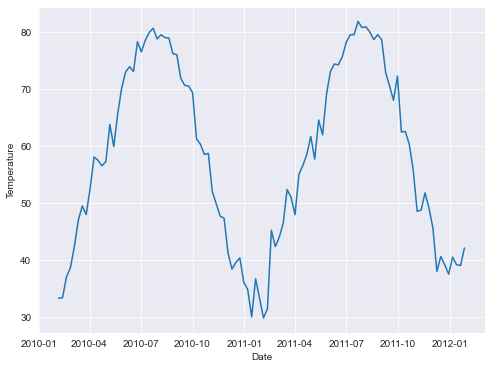

In [138]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Date', y='Temperature', data=train.groupby(['Date']).mean().reset_index())
plt.show()

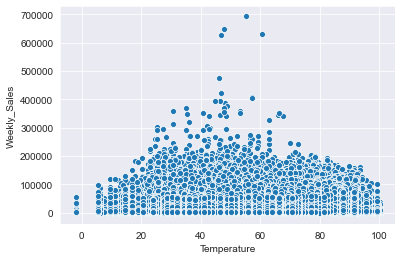

In [139]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train)

In [140]:
train[['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000,-0.004
Temperature,-0.004,1.000


In [141]:
july_2010 = train[(train.Month == 7) & (train.Year == 2010)].groupby(['Store']).agg(
    min_temp=('Temperature', 'min'), max_temp=('Temperature', 'max')).reset_index()

july_2010['delta_temp'] = july_2010.max_temp - july_2010.min_temp
july_2010.sort_values(['delta_temp'], ascending=False).head(2)

,Store,min_temp,max_temp,delta_temp
22,23,64.760,77.160,12.400
25,26,58.900,71.080,12.180


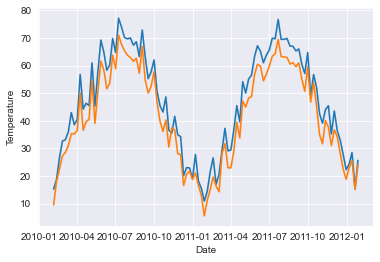

In [142]:
sns.lineplot(x='Date', y='Temperature', data=train[train.Store == 23])
sns.lineplot(x='Date', y='Temperature', data=train[train.Store == 26])

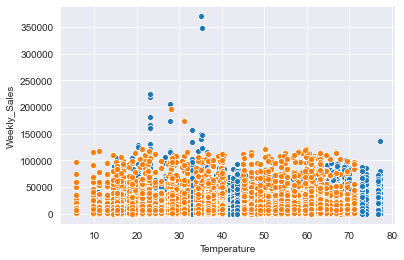

In [143]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train[train.Store == 23])
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train[train.Store == 26])

In [144]:
train[train.Store == 23][['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000,-0.000
Temperature,-0.000,1.000


In [145]:
train[train.Store == 26][['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000,0.016
Temperature,0.016,1.000


In [146]:
average_t = train.groupby(['Store', 'Month', 'Year']).agg(AvgTmp=('Temperature', 'mean')).reset_index()
train = train.merge(average_t, on=['Store', 'Month', 'Year'])
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,Week,Month,Year,Regular_Weeks,Other_Holidays,Is_SuperBowl,Is_BlackFriday,Is_Christmas,AvgTmp
0,1,1,2010-02-05,24924.500,False,42.310,2.572,nan,nan,nan,...,151315,5,2,2010,True,False,False,False,False,41.840
1,1,2,2010-02-05,50605.270,False,42.310,2.572,nan,nan,nan,...,151315,5,2,2010,True,False,False,False,False,41.840
2,1,3,2010-02-05,13740.120,False,42.310,2.572,nan,nan,nan,...,151315,5,2,2010,True,False,False,False,False,41.840


#### 5. Drop `Fuel_Price`, `MarkDown1`, `MarkDown2`, `MarkDown3`, `MarkDown4`, `MarkDown5`, `CPI`, `Unemployment`, `Temperature` as they only appears for the downloaded train table (they are not available for the “future”).
#### 6. Generate `sample_weights` attribute and set the roles for `sample_weights` (weight) and `Weekly_Sales` (label); Drop `Is_Holiday` and `Type` attribute;

In [147]:
train = train.drop(['Fuel_Price', 'CPI', 'Unemployment', 'Temperature', \
                    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)
test = test.drop(['Fuel_Price', 'CPI', 'Unemployment', 'Temperature', \
                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

In [149]:
train['sample_weights'] = train.Regular_Weeks.apply(lambda x: 1 if x else 5)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Week,Month,Year,Regular_Weeks,Other_Holidays,Is_SuperBowl,Is_BlackFriday,Is_Christmas,AvgTmp,sample_weights
0,1,1,2010-02-05,24924.500,False,A,151315,5,2,2010,True,False,False,False,False,41.840,1
1,1,2,2010-02-05,50605.270,False,A,151315,5,2,2010,True,False,False,False,False,41.840,1
2,1,3,2010-02-05,13740.120,False,A,151315,5,2,2010,True,False,False,False,False,41.840,1
3,1,4,2010-02-05,39954.040,False,A,151315,5,2,2010,True,False,False,False,False,41.840,1
4,1,5,2010-02-05,32229.380,False,A,151315,5,2,2010,True,False,False,False,False,41.840,1
